In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [7]:
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis] 

In [8]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

In [9]:
y = np.array( [236.4, 234.4, 252.8, 298.6, 314.2,342.2, 360.8, 368.0, 391.2, 390.8])

In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()
pr = LinearRegression()

In [20]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

Fitting Simple Linear reg.

In [21]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
X_fit = np.arange(250,600,10)[:, np.newaxis]


In [23]:
y_lin_fit = lr.predict(X_fit)

In [24]:
y_lin_fit

array([250.86164718, 256.26469105, 261.66773493, 267.0707788 ,
       272.47382268, 277.87686655, 283.27991043, 288.6829543 ,
       294.08599818, 299.48904205, 304.89208593, 310.2951298 ,
       315.69817368, 321.10121755, 326.50426142, 331.9073053 ,
       337.31034917, 342.71339305, 348.11643692, 353.5194808 ,
       358.92252467, 364.32556855, 369.72861242, 375.1316563 ,
       380.53470017, 385.93774405, 391.34078792, 396.7438318 ,
       402.14687567, 407.54991955, 412.95296342, 418.3560073 ,
       423.75905117, 429.16209505, 434.56513892])

Fitting Multiple Linear regression

In [27]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

In [28]:
y_quad_fit

array([215.86619864, 228.37947485, 240.44271083, 252.0559066 ,
       263.21906215, 273.93217748, 284.19525259, 294.00828748,
       303.37128216, 312.28423661, 320.74715085, 328.76002487,
       336.32285867, 343.43565226, 350.09840562, 356.31111877,
       362.0737917 , 367.38642441, 372.2490169 , 376.66156917,
       380.62408123, 384.13655306, 387.19898468, 389.81137608,
       391.97372726, 393.68603823, 394.94830897, 395.7605395 ,
       396.12272981, 396.03487989, 395.49698977, 394.50905942,
       393.07108885, 391.18307807, 388.84502707])

plot

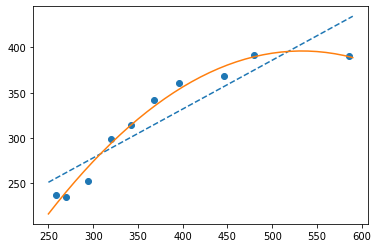

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X,y, label='traininng points')
plt.plot(X_fit, y_lin_fit, label ='liner_fit', linestyle = '--')
plt.plot(X_fit, y_quad_fit, label ='quadratic fit')

## Non Linear Relationship in Housing Data

In [32]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/''python-machine-learning-book-2nd-edition''/master/code/ch10/housing.data.txt',header=None,sep='\s+')
df.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 
            'NOX', 'RM','AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
             'LSTAT', 'MEDV' ]

In [33]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [34]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [35]:
regr = LinearRegression()

In [38]:
# creating quadratic Features

quadratic = PolynomialFeatures(degree=2)
cubic  = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [40]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [45]:
from sklearn.metrics import r2_score
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y ,regr.predict(X))

In [47]:
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [48]:
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

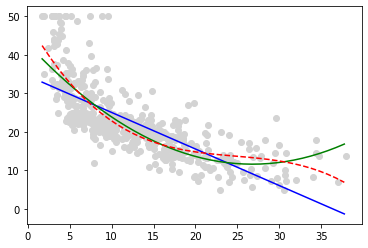

In [56]:
#plotting

plt.scatter(X, y, label='training data', color ='lightgray')

plt.plot(X_fit, y_lin_fit, label = 'Linear', color ='blue')

plt.plot(X_fit, y_quad_fit, label = 'Linear', color ='green')

plt.plot(X_fit, y_cubic_fit, label = 'Linear', color ='red', linestyle ='--')